# Quality Analysis (General)

#### Updated: May 19, 2023

#  

Quality analysis pipeline after phase 2 of Alouette processing (OCR processing phase):

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
rootDir = 'L:/DATA/Alouette_I/BATCH_II_Run2/'
resultDir = rootDir + '05_result/'
logDir = rootDir + '06_log/'

#  

#### Combine BATCH I and II:

#  

#### Stage 1 - Overall Statistics:

In [5]:
df_inventory = pd.read_csv(logDir + 'image_inventory.csv')
n_images = df_inventory['images'].sum()

In [6]:
df_s1 = pd.read_csv(resultDir + 'result_stage1_raw.csv', low_memory=False)

In [7]:
n_proc = len(df_s1.loc[df_s1['processed_image_class'] == 'num']) + len(df_s1.loc[df_s1['processed_image_class'] == 'dot'])
n_loss = len(df_s1.loc[df_s1['processed_image_class'] == 'loss'])
n_outlier = len(df_s1.loc[df_s1['processed_image_class'] == 'outlier'])
n_unproc = n_images - n_proc - n_outlier - n_loss

In [8]:
print('# of images: ' + str(n_images))
print('# of images processed after stage 1 processing: ' + str(n_proc))
print('% of images processed after stage 1 processing: ' + str(round(((n_proc/n_images)*100), 2)) + ' %')
print('')
print("% total loss after stage 1 processing: " + str(round((((n_unproc + n_loss + n_outlier)/n_images)*100), 2)) + ' %')
print('% of images unprocessed after stage 1 processing: ' + str(round(((n_unproc/n_images)*100), 2)) + ' %')
print("% of images classified as 'loss' after stage 1 processing: " + str(round(((n_loss/n_images)*100), 2)) + ' %')
print("% of images classified as 'outlier' after stage 1 processing: " + str(round(((n_outlier/n_images)*100), 2)) + ' %')

# of images: 726577
# of images processed after stage 1 processing: 449732
% of images processed after stage 1 processing: 61.9 %

% total loss after stage 1 processing: 38.1 %
% of images unprocessed after stage 1 processing: 17.34 %
% of images classified as 'loss' after stage 1 processing: 13.07 %
% of images classified as 'outlier' after stage 1 processing: 7.7 %


Breakdown 'loss' type:

In [9]:
df_loss_bd = df_s1.loc[df_s1['processed_image_class'] == 'loss'].groupby(['func_name']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
func_name,
metadata_translation.determine_leftside_metadata_grid_mapping.extract_centroids_and_determine_type,37872
ionogram_content_extraction.extract_select_parameters.extract_fmin_and_max_depth,9521
image_segmentation.trim_raw_metadata.trimming_metadata,3968
image_segmentation.extract_ionogram_from_scan.extract_ionogram,1


Breakdown 'outlier' type:

In [10]:
df_outlier_bd = df_s1.loc[df_s1['processed_image_class'] == 'outlier'].groupby(['func_name']).count()[['filename']]
df_outlier_bd.sort_values('filename', ascending=False)

,filename
func_name,
image_segmentation.segment_images_in_subdir.segment_images: iono size outlier,54428
image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier,1511


#  

#### Stage 2 - Overall Statistics:

In [11]:
df_s2 = pd.read_csv(resultDir + 'result_stage2_raw.csv', low_memory=False)

In [12]:
n_num2 = len(df_s2.loc[df_s2['processed_image_class'] == 'num2'])
n_num = len(df_s2.loc[df_s2['processed_image_class'] == 'num'])
n_dot = len(df_s2.loc[df_s2['processed_image_class'] == 'dot'])
n_proc2 = n_num2 + n_num + n_dot
n_loss = len(df_s2.loc[df_s2['processed_image_class'] == 'loss'])
n_outlier = len(df_s2.loc[df_s2['processed_image_class'] == 'outlier'])

In [13]:
print('# of images processed after stage 2 processing: ' + str(n_proc2))
print('% of images processed after stage 2 processing: ' + str(round(((n_proc2/n_images)*100), 2)) + ' %')
print('')
print("% of images classified as 'num2' after stage 2 processing: " + str(round(((n_num2/n_images)*100), 2)) + ' %')
print("% of images classified as 'num' after stage 2 processing: " + str(round(((n_num/n_images)*100), 2)) + ' %')
print("% of images classified as 'dot' after stage 2 processing: " + str(round(((n_dot/n_images)*100), 2)) + ' %')
print('')
print("% total loss after stage 2 processing: " + str(round((((n_unproc + n_loss + n_outlier)/n_images)*100), 2)) + ' %')
print("% of images classified as 'loss' after stage 2 processing: " + str(round(((n_loss/n_images)*100), 2)) + ' %')
print("% of images classified as 'outlier' after stage 2 processing: " + str(round(((n_outlier/n_images)*100), 2)) + ' %')

# of images processed after stage 2 processing: 273860
% of images processed after stage 2 processing: 37.69 %

% of images classified as 'num2' after stage 2 processing: 14.51 %
% of images classified as 'num' after stage 2 processing: 22.17 %
% of images classified as 'dot' after stage 2 processing: 1.01 %

% total loss after stage 2 processing: 62.31 %
% of images classified as 'loss' after stage 2 processing: 37.42 %
% of images classified as 'outlier' after stage 2 processing: 7.55 %


Breakdown 'loss' type:

In [14]:
df_s2_loss = df_s2.copy(deep=True).loc[df_s2['processed_image_class'] == 'loss']
df_s2_loss['loss_summary'] = df_s2_loss['func_name'] + ', ' + df_s2_loss['details'] 
df_loss_bd = df_s2_loss.groupby(['loss_summary']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
loss_summary,
"image_segmentation.segment_images_in_subdir.segment_images: iono size outlier, OCR read metadata contains letters",1070
"ionogram_content_extraction.extract_select_parameters.extract_fmin_and_max_depth, OCR read metadata contains letters",187
"metadata_translation.determine_leftside_metadata_grid_mapping.extract_centroids_and_determine_type, OCR read metadata contains letters",35
"image_segmentation.trim_raw_metadata.trimming_metadata, OCR read metadata contains letters",20
"image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier, OCR read metadata contains letters",8


In [15]:
df_s2_loss = df_s2.loc[df_s2['processed_image_class'] == 'loss']
df_loss_bd = df_s2_loss.groupby(['details']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
details,
metadata could not be read by OCR,156231
OCR read metadata contains letters,16543
metadata was interpreted to be num type,2386
metadata was interpreted to be dot type,2195


Breakdown 'outlier' type:

In [16]:
df_s2_outlier = df_s2.loc[df_s2['processed_image_class'] == 'outlier']
df_outlier_bd = df_s2_outlier.groupby(['func_name']).count()[['filename']]
df_outlier_bd.sort_values('filename', ascending=False)

,filename
func_name,
image_segmentation.segment_images_in_subdir.segment_images: iono size outlier,53358
image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier,1503


#  

#### Master - Overall Statistics:

In [42]:
df_master = pd.read_csv(resultDir + 'result_master.csv', low_memory=False)
n_master = len(df_master.loc[(~pd.isna(df_master['Station_Code'])) & (df_master['time_quality'] == 1)])

In [43]:
n_tq1 = len(df_master.loc[df_master['time_quality'] == 1])
n_tq2 = len(df_master.loc[df_master['time_quality'] == 2])
n_tq3 = len(df_master.loc[df_master['time_quality'] == 3])
n_tq4 = len(df_master.loc[df_master['time_quality'] == 4])

In [44]:
print('# of images fully read after stage 2 processing: ' + str(n_master))
print('% of images fully read after stage 2 processing (yield): ' + str(round(((n_master/n_images)*100), 2)) + ' %')
print('')
print('% time quality level 1 yield: ' + str(round(((n_tq1/n_images)*100), 2)) + ' %')
print('% at least time quality level 2: ' + str(round((((n_tq1+n_tq2)/n_images)*100), 2)) + ' %')
print('% at least time quality level 3: ' + str(round((((n_tq1+n_tq2+n_tq3)/n_images)*100), 2)) + ' %')
print('% at least time quality level 4: ' + str(round((((n_tq1+n_tq2+n_tq3+n_tq4)/n_images)*100), 2)) + ' %')

# of images fully read after stage 2 processing: 206644
% of images fully read after stage 2 processing (yield): 28.44 %

% time quality level 1 yield: 28.44 %
% at least time quality level 2: 28.53 %
% at least time quality level 3: 28.71 %
% at least time quality level 4: 29.78 %


#  

#### Data distribution by ground station:

In [20]:
df2 = df_master.copy(deep=True)
df2['Station_Number_Station_Code_processed_image_class'] = df2['Station_Number'].astype(int).astype(str) + '_' + df2['Station_Code'] + '_' + df2['processed_image_class']

In [21]:
df_master_by_stn = df2.groupby(['Station_Number']).count()[['filename']].sort_values('filename', ascending=False)
df_master_by_stn.head(10)

,filename
Station_Number,
5.0,38320
50.0,22014
13.0,18120
43.0,17830
1.0,16197
3.0,13433
9.0,12143
8.0,8958
12.0,8833


In [22]:
df_master_by_stnname = df2.groupby(['Station_Name']).count()[['filename']].sort_values('filename', ascending=False)
df_master_by_stnname.head(50)

,filename
Station_Name,
"Quito, Ecuador",40244
"Ottawa, Canada",22427
"Resolute Bay, NT, Canada",19398
"College, Fairbanks, AK, USA",17434
Falkland Islands (Islas Malvinas),15564
"Blossom Point, MD, USA",14791
"Fort Myers, FL, USA",13031
"Winkfield, England, UK",10181
"St. John's, NL, Canada",8703


In [23]:
df_master_by_stn_code = df2.groupby(['Station_Number_Station_Code_processed_image_class']).count()[['filename']].sort_values('filename', ascending=False)
df_master_by_stn_code.head(20)

,filename
Station_Number_Station_Code_processed_image_class,
5_QUI_num,32854
50_OTT_num2,21337
43_RES_num2,17748
13_COL_num,16826
1_BPT_num,14626
9_SOL_num,11117
3_FTM_num,8018
53_KNO_num2,6623
69_TRO_num2,6426


- show geographic distribution by metatype type 
- show geographic distribution by year

- show how each ground station used the same metadata type over time (metadata composition by ground station over time)


- Matplotlib - basemap
- cartopy
- ipyleaflet (interactive)
- plotly 

- make availability plot for each ground station
    - could be sparklines to show amount of data vs time, by ground station

In [46]:
df_master['Station_Code'].unique()

array(['COL', 'RES', 'SNP', 'ULA', 'SOL', 'MOJ', 'WNK', 'PRI', 'OTT',
       'TRO', 'ROS', 'JOB', 'WOO', 'NEW', 'ANT', 'GRK', 'RAL', 'BPT',
       'BAT', 'FTM', 'QUI', 'SPT', 'HAW', 'BFR', 'GIL', 'SNT', 'KNO',
       'MAD', 'KJP', 'LIM', 'BLR', 'PCI', 'DAR'], dtype=object)

In [48]:
df_master_stn = df_master.loc[df_master['Station_Code'] == 'COL']
len(df_master_stn)

17434

In [49]:
df_master_stn.head()

,Directory,Subdirectory,filename,processed_image_class,fmin,max_depth,Timestamp,time_quality,Station_Number,Station_Code,Station_Name,Lat,Lng
0,R014207944,2010-5B,278.png,num,1.713710,1407.547170,1962-10-04 21:52:50,1.0,5.0,COL,"College, Fairbanks, AK, USA",64.9N,147.8W
1019,R014207945,2264-5A,7.png,num,1.500000,1137.500000,1962-10-27 00:00:00,4.0,5.0,COL,"College, Fairbanks, AK, USA",64.9N,147.8W
1020,R014207945,2264-5A,64.png,num,1.629032,2795.833333,1962-10-27 00:00:00,4.0,5.0,COL,"College, Fairbanks, AK, USA",64.9N,147.8W
1022,R014207945,2264-5A,57.png,num,1.504032,1345.833333,1962-10-27 00:00:00,4.0,5.0,COL,"College, Fairbanks, AK, USA",64.9N,147.8W
1023,R014207945,2264-5A,65.png,num,1.653226,1137.500000,1962-10-27 00:00:00,4.0,5.0,COL,"College, Fairbanks, AK, USA",64.9N,147.8W


#  

#### Construct process_summary:

Load data:

In [24]:
print(len(df_inventory))
df_inventory.head()

2416


,Directory,Subdirectory,images,subdir_id
0,R014207709,145,53,R014207709_145
1,R014207709,146,63,R014207709_146
2,R014207709,147,50,R014207709_147
3,R014207709,148,16,R014207709_148
4,R014207709,149,28,R014207709_149


In [25]:
df_process_log = pd.read_csv(logDir + 'process_log.csv')
print(len(df_process_log))
df_p1 = df_process_log.sort_values('Process_timestamp', ascending=True)
df_p1 = df_p1.drop_duplicates(subset=['subdir_id'], keep='last') 
print(len(df_p1))
df_p1.head()

2487
2417


,Directory,Subdirectory,Images_processed,Images_dot,Images_num,Images_loss,Images_outlier,Process_time,Process_timestamp,User,subdir_id
0,R014207837,4013-50,162.0,0.0,150.0,4.0,8.0,277.122729,2023-05-13 11:13:35.969795,Rav Super3,R014207837_4013-50
1,R014207769,JUNE-28-TO-JULY-6-1965,0.0,0.0,0.0,0.0,0.0,214.129275,2023-05-13 11:13:50.695690,Rav Super5,R014207769_JUNE-28-TO-JULY-6-1965
2,R014207820,2993-43A,16.0,0.0,12.0,0.0,4.0,232.333798,2023-05-13 11:15:58.948288,Rav Super8,R014207820_2993-43A
3,R014207813,5037,339.0,0.0,0.0,278.0,61.0,267.199561,2023-05-13 11:17:12.488731,Rav Super9,R014207813_5037
4,R014207822,3436-50-A,267.0,0.0,257.0,0.0,10.0,541.358854,2023-05-13 11:23:17.637033,Rav Super5,R014207822_3436-50-A


In [26]:
df_process_log2 = pd.read_csv(logDir + 'process_log_OCR.csv')
print(len(df_process_log2))
df_p2 = df_process_log2.sort_values('Process_timestamp', ascending=True)
df_p2 = df_p2.drop_duplicates(subset=['subdir_id'], keep='last') 
print(len(df_p2))
df_p2.head()

1989
1977


,Directory,Subdirectory,Process_time,Process_timestamp,User,subdir_id
0,R014207827,3822-43A,990.216040,2023-05-15 18:06:19.824654,Rav Super1,R014207827_3822-43A
1,R014207820,3000-43A,1062.283440,2023-05-15 18:24:02.150093,Rav Super1,R014207820_3000-43A
2,R014207835,4060-19,940.294587,2023-05-15 18:39:42.472678,Rav Super1,R014207835_4060-19
3,R014207963,1544-1B,814.297740,2023-05-15 18:53:16.795418,Rav Super1,R014207963_1544-1B
4,R014207711,39,384.984926,2023-05-15 18:59:41.800343,Rav Super1,R014207711_39


In [27]:
df_pp = pd.read_csv(resultDir + 'result_postprocess_raw.csv', low_memory=False)

Construct process_summary:

In [28]:
df_sum1 = df_inventory.merge(df_p1[['Images_processed', 'Images_loss', 'Images_outlier', 'Process_time', 'subdir_id']], how='left', on='subdir_id')
df_sum1 = df_sum1.rename(columns={
    'images': 'n_images',
    'Images_loss': 'n_stage1_loss',
    'Images_outlier': 'n_stage1_outlier',
    'Process_time': 'process_time_stage1'
})
df_sum1['n_stage1_processed'] = df_sum1['Images_processed'] - df_sum1['n_stage1_loss'] - df_sum1['n_stage1_outlier']
df_sum1['n_stage1_unprocessed'] = df_sum1['n_images'] - df_sum1['Images_processed']
df_sum1 = df_sum1[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'subdir_id']]
print(len(df_sum1))
df_sum1.sample(10)

2416


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,subdir_id
2405,R028224481,4916,502,15.0,1.0,475.0,11.0,1597.435714,R028224481_4916
1356,R014207834,4458-15A,259,219.0,4.0,5.0,31.0,806.185539,R014207834_4458-15A
924,R014207825,3785-69A,342,334.0,0.0,1.0,7.0,1492.157638,R014207825_3785-69A
2134,R014207952,2722-9A,357,342.0,3.0,3.0,9.0,1260.289237,R014207952_2722-9A
306,R014207807,4934,256,0.0,256.0,0.0,0.0,194.804012,R014207807_4934
1564,R014207837,4006-50A,360,324.0,0.0,7.0,29.0,221.883604,R014207837_4006-50A
1390,R014207834,4492-43,276,254.0,0.0,3.0,19.0,1897.017583,R014207834_4492-43
772,R014207820,2969-5B,327,7.0,0.0,312.0,8.0,950.604884,R014207820_2969-5B
1454,R014207835,4077-38A,241,227.0,1.0,0.0,13.0,517.713391,R014207835_4077-38A
332,R014207807,4960,325,5.0,0.0,275.0,45.0,388.185194,R014207807_4960


In [29]:
df_sum2 = df_sum1.merge(df_p2[['Process_time', 'subdir_id']], how='left', on='subdir_id')
df_sum2 = df_sum2.rename(columns={
    'Process_time': 'process_time_stage2'
})
df_sum2 = df_sum2[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'subdir_id']]
print(len(df_sum2))
df_sum2.sample(10)

2416


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,subdir_id
1203,R014207830,3705-5A,296,282.0,1.0,0.0,13.0,677.006824,366.472696,R014207830_3705-5A
372,R014207808,4580-19,306,236.0,15.0,14.0,41.0,1892.628242,610.121440,R014207808_4580-19
1364,R014207834,4466-69A,296,266.0,0.0,3.0,27.0,1238.502295,257.095368,R014207834_4466-69A
1956,R014207944,2002-5A,310,288.0,3.0,6.0,13.0,659.409336,172.542506,R014207944_2002-5A
1230,R014207831,3912-43A,312,290.0,1.0,5.0,16.0,501.117466,655.503544,R014207831_3912-43A
777,R014207820,2974-5B,294,277.0,2.0,4.0,11.0,1081.579426,420.978936,R014207820_2974-5B
1792,R014207886,B-2492,256,0.0,256.0,0.0,0.0,163.713271,NaN,R014207886_B-2492
1059,R014207828,4401-69,320,284.0,28.0,1.0,7.0,950.054579,268.211247,R014207828_4401-69
2405,R028224481,4916,502,15.0,1.0,475.0,11.0,1597.435714,2346.975529,R028224481_4916
811,R014207822,3429-50A,284,277.0,0.0,0.0,7.0,691.606185,975.769873,R014207822_3429-50A


In [30]:
df_s2['subdir_id'] = df_s2['Directory'] + '_' + df_s2['Subdirectory']
df_sum3_ = pd.DataFrame()

for i in range(0, len(df_sum2)):
    subdir_id = df_sum2['subdir_id'].iloc[i]
    df_s2_ = df_s2[['processed_image_class', 'filename', 'subdir_id']].loc[df_s2['subdir_id'] == subdir_id]
    if len(df_s2_) > 0:
        n_s2_proc = len(df_s2_.loc[df_s2_['processed_image_class'] == 'num2']) + len(df_s2_.loc[df_s2_['processed_image_class'] == 'num']) + len(df_s2_.loc[df_s2_['processed_image_class'] == 'dot'])
        n_s2_loss = len(df_s2_.loc[df_s2_['processed_image_class'] == 'loss'])
        n_s2_outlier = len(df_s2_.loc[df_s2_['processed_image_class'] == 'outlier'])
        row = pd.DataFrame({
            'n_stage2_processed': n_s2_proc,
            'n_stage2_loss': n_s2_loss,
            'n_stage2_outlier': n_s2_outlier,
            'subdir_id': subdir_id
        }, index=[0])
        df_sum3_ = pd.concat([df_sum3_, row])

df_sum3 = df_sum2.merge(df_sum3_, how='left', on='subdir_id')
df_sum3 = df_sum3[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'n_stage2_processed', 'n_stage2_loss',
                  'n_stage2_outlier', 'subdir_id']]

In [31]:
print(len(df_sum3))
df_sum3.sample(10)

2416


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,n_stage2_processed,n_stage2_loss,n_stage2_outlier,subdir_id
1537,R014207837,3979-50A,323,299.0,0.0,4.0,20.0,741.568211,2108.513434,89.0,215.0,19.0,R014207837_3979-50A
1292,R014207833,4334-5,301,285.0,0.0,0.0,16.0,2064.239581,191.842884,233.0,52.0,16.0,R014207833_4334-5
408,R014207808,4616-50,286,226.0,5.0,4.0,51.0,828.177002,1100.951419,72.0,163.0,46.0,R014207808_4616-50
1274,R014207831,3956-43,341,319.0,1.0,4.0,17.0,1256.817323,1000.679367,177.0,146.0,17.0,R014207831_3956-43
1959,R014207944,2005-5B,302,269.0,5.0,11.0,17.0,907.628395,300.059289,269.0,11.0,17.0,R014207944_2005-5B
906,R014207825,3767-50A-2,299,238.0,1.0,49.0,11.0,754.657472,256.877043,3.0,284.0,11.0,R014207825_3767-50A-2
821,R014207822,3440-50A,274,0.0,274.0,0.0,0.0,217.161499,NaN,NaN,NaN,NaN,R014207822_3440-50A
2228,R014207961,1075-B,343,326.0,1.0,6.0,10.0,1024.389079,294.808232,326.0,6.0,10.0,R014207961_1075-B
831,R014207822,3450-15A,308,296.0,0.0,2.0,10.0,217.123103,165.507596,0.0,298.0,10.0,R014207822_3450-15A
711,R014207819,4767-50,100,93.0,0.0,0.0,7.0,287.639796,426.707465,0.0,94.0,6.0,R014207819_4767-50


In [32]:
df_pp['subdir_id'] = df_pp['Directory'] + '_' + df_pp['Subdirectory']
df_sum4_ = pd.DataFrame()

for i in range(0, len(df_sum3)):
    subdir_id = df_sum3['subdir_id'].iloc[i]
    df_pp_ = df_pp[['processed_image_class', 'filename', 'subdir_id']].loc[df_pp['subdir_id'] == subdir_id]
    if len(df_pp_) > 0:
        n_pp_proc = len(df_pp_.loc[df_pp_['processed_image_class'] == 'num2']) + len(df_pp_.loc[df_pp_['processed_image_class'] == 'num']) + len(df_pp_.loc[df_pp_['processed_image_class'] == 'dot'])
        n_pp_loss = len(df_pp_.loc[df_pp_['processed_image_class'] == 'loss'])
        n_pp_outlier = len(df_pp_.loc[df_pp_['processed_image_class'] == 'outlier'])
        row = pd.DataFrame({
            'n_postprocess_processed': n_pp_proc,
            'n_postprocess_loss': n_pp_loss,
            'n_postprocess_outlier': n_pp_outlier,
            'subdir_id': subdir_id
        }, index=[0])
        df_sum4_ = pd.concat([df_sum4_, row])

df_sum4 = df_sum3.merge(df_sum4_, how='left', on='subdir_id')
df_sum4 = df_sum4[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'n_stage2_processed', 'n_stage2_loss',
                  'n_stage2_outlier', 'n_postprocess_processed', 'n_postprocess_loss', 'n_postprocess_outlier', 'subdir_id']]

In [33]:
print(len(df_sum4))
df_sum4.sample(10)

2416


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,n_stage2_processed,n_stage2_loss,n_stage2_outlier,n_postprocess_processed,n_postprocess_loss,n_postprocess_outlier,subdir_id
1041,R014207827,3842-43A,329,312.0,0.0,6.0,11.0,893.427018,250.490364,23.0,295.0,11.0,23.0,295.0,11.0,R014207827_3842-43A
1834,R014207892,108,26,0.0,26.0,0.0,0.0,169.551260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207892_108
919,R014207825,3780-43A,337,311.0,0.0,5.0,21.0,1696.182219,1330.645339,30.0,288.0,19.0,30.0,288.0,19.0,R014207825_3780-43A
596,R014207817,4173-03A,312,225.0,35.0,8.0,44.0,931.512177,271.836477,178.0,56.0,43.0,178.0,56.0,43.0,R014207817_4173-03A
2258,R014207963,1527-1B,333,290.0,6.0,1.0,36.0,678.794495,242.027054,290.0,1.0,36.0,290.0,1.0,36.0,R014207963_1527-1B
2349,R014207969,1320-5A,348,327.0,6.0,7.0,8.0,1012.779327,681.708360,303.0,31.0,8.0,303.0,31.0,8.0,R014207969_1320-5A
858,R014207822,3479-8A-2,325,312.0,0.0,0.0,13.0,634.509614,217.507442,0.0,312.0,13.0,0.0,312.0,13.0,R014207822_3479-8A-2
706,R014207819,4762-50,270,209.0,0.0,5.0,56.0,517.775556,911.108925,11.0,207.0,52.0,11.0,207.0,52.0,R014207819_4762-50
1704,R014207839,4147-15A,363,344.0,0.0,2.0,17.0,763.895670,474.789637,241.0,105.0,17.0,241.0,105.0,17.0,R014207839_4147-15A
562,R014207813,5040,404,0.0,151.0,129.0,124.0,365.848828,1795.346803,0.0,129.0,124.0,0.0,129.0,124.0,R014207813_5040


In [34]:
df_master['subdir_id'] = df_master['Directory'] + '_' + df_master['Subdirectory']
df_sum5_ = pd.DataFrame()

for i in range(0, len(df_sum4)):
    subdir_id = df_sum4['subdir_id'].iloc[i]
    df_master_ = df_master[['processed_image_class', 'filename', 'subdir_id']].loc[df_master['subdir_id'] == subdir_id]
    if len(df_master_) > 0:
        n_mas = len(df_master_)
        n_mas_num2 = len(df_master_.loc[df_master_['processed_image_class'] == 'num2'])
        n_mas_num = len(df_master_.loc[df_master_['processed_image_class'] == 'num'])
        n_mas_dot = len(df_master_.loc[df_master_['processed_image_class'] == 'dot'])
        row = pd.DataFrame({
            'n_master': n_mas,
            'n_master_num2': n_mas_num2,
            'n_master_num': n_mas_num,
            'n_master_dot': n_mas_dot,
            'subdir_id': subdir_id
        }, index=[0])
        df_sum5_ = pd.concat([df_sum5_, row])

df_sum5 = df_sum4.merge(df_sum5_, how='left', on='subdir_id')
df_sum5 = df_sum5[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'n_stage2_processed', 'n_stage2_loss',
                  'n_stage2_outlier', 'n_postprocess_processed', 'n_postprocess_loss', 'n_postprocess_outlier', 
                  'n_master', 'n_master_num2', 'n_master_num', 'n_master_dot', 'subdir_id']]

In [35]:
print(len(df_sum5))
df_sum5.sample(10)

2416


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,n_stage2_processed,n_stage2_loss,n_stage2_outlier,n_postprocess_processed,n_postprocess_loss,n_postprocess_outlier,n_master,n_master_num2,n_master_num,n_master_dot,subdir_id
2377,R028224481,4888,333,0.0,0.0,270.0,63.0,275.345795,667.456486,0.0,270.0,63.0,0.0,270.0,63.0,NaN,NaN,NaN,NaN,R028224481_4888
468,R014207811,5065,511,12.0,0.0,486.0,13.0,2118.755657,373.175520,12.0,486.0,13.0,12.0,486.0,13.0,NaN,NaN,NaN,NaN,R014207811_5065
1419,R014207835,4042-53A,291,255.0,0.0,18.0,18.0,613.627705,155.698509,194.0,79.0,18.0,194.0,79.0,18.0,194.0,194.0,0.0,0.0,R014207835_4042-53A
2039,R014207945,2267-5A,335,303.0,5.0,2.0,25.0,1163.156051,702.070033,303.0,2.0,25.0,303.0,2.0,25.0,26.0,0.0,26.0,0.0,R014207945_2267-5A
1157,R014207829,4319-8,268,242.0,0.0,8.0,18.0,392.979370,274.161927,2.0,248.0,18.0,2.0,248.0,18.0,2.0,2.0,0.0,0.0,R014207829_4319-8
844,R014207822,3465-19A,306,301.0,1.0,1.0,3.0,682.329687,190.295286,0.0,302.0,3.0,0.0,302.0,3.0,NaN,NaN,NaN,NaN,R014207822_3465-19A
1329,R014207833,4371-69,305,283.0,0.0,7.0,15.0,1189.196323,382.063642,183.0,107.0,15.0,183.0,107.0,15.0,132.0,132.0,0.0,0.0,R014207833_4371-69
1628,R014207838,4551-50,271,254.0,1.0,1.0,15.0,905.613534,268.080787,88.0,169.0,13.0,88.0,169.0,13.0,87.0,87.0,0.0,0.0,R014207838_4551-50
2256,R014207963,1525-5A,336,299.0,21.0,2.0,14.0,899.591297,6965.679774,286.0,15.0,14.0,286.0,15.0,14.0,139.0,0.0,139.0,0.0,R014207963_1525-5A
1140,R014207829,4301-19A,272,250.0,1.0,1.0,20.0,2175.074285,217.588414,51.0,200.0,20.0,51.0,200.0,20.0,46.0,46.0,0.0,0.0,R014207829_4301-19A


In [36]:
df_sum5.to_csv(logDir + 'process_summary.csv', index=False)

#  

#### Plot histograms to characterize quality of processed subdirectories:

In [37]:
df_summary = pd.read_csv(logDir + 'process_summary.csv')
df_summary.head()

,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,n_stage2_processed,n_stage2_loss,n_stage2_outlier,n_postprocess_processed,n_postprocess_loss,n_postprocess_outlier,n_master,n_master_num2,n_master_num,n_master_dot,subdir_id
0,R014207709,145,53,0.0,53.0,0.0,0.0,160.138679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207709_145
1,R014207709,146,63,0.0,63.0,0.0,0.0,171.073522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207709_146
2,R014207709,147,50,0.0,50.0,0.0,0.0,165.924752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207709_147
3,R014207709,148,16,0.0,16.0,0.0,0.0,128.509444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207709_148
4,R014207709,149,28,0.0,28.0,0.0,0.0,146.482055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207709_149


<Axes: xlabel='pc_stage1_processed', ylabel='Percent'>

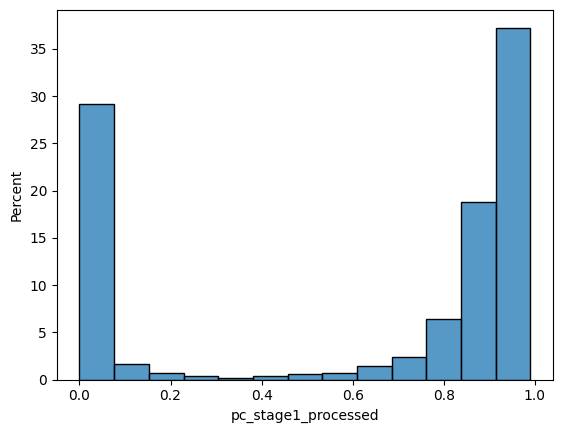

In [38]:
df_summary['pc_stage1_processed'] = df_summary['n_stage1_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_stage1_processed', stat='percent')

<Axes: xlabel='pc_stage2_processed', ylabel='Percent'>

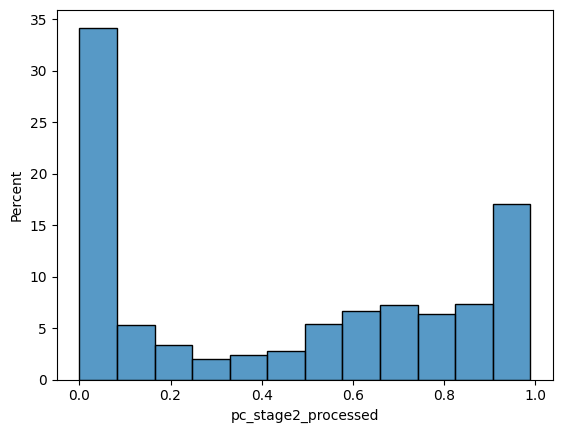

In [39]:
df_summary['pc_stage2_processed'] = df_summary['n_stage2_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_stage2_processed', stat='percent')

<Axes: xlabel='pc_postprocess_processed', ylabel='Percent'>

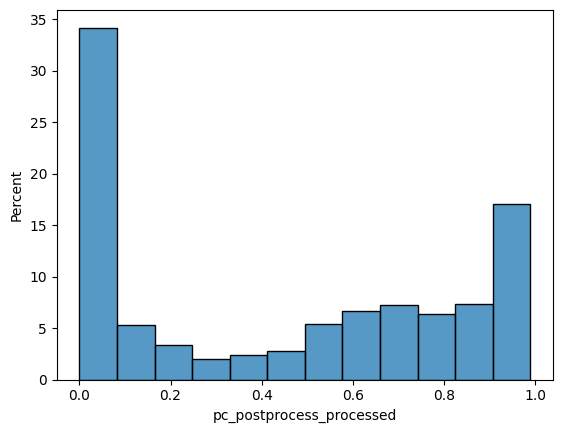

In [40]:
df_summary['pc_postprocess_processed'] = df_summary['n_postprocess_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_postprocess_processed', stat='percent')

<Axes: xlabel='yield', ylabel='Percent'>

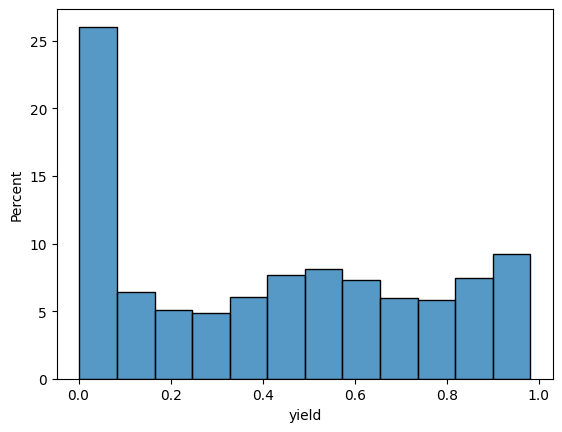

In [41]:
df_summary['yield'] = df_summary['n_master']/df_summary['n_images']
sns.histplot(data=df_summary, x='yield', stat='percent')